In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
red_wine_df = pd.read_csv("resources/winequality-red.csv", sep=';')
white_wine_df = pd.read_csv("resources/winequality-white.csv", sep=';')
white_wine_df.info()
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64

In [3]:

baseline_red_df = red_wine_df.copy()
baseline_white_df = white_wine_df.copy()
baseline_df = pd.concat([baseline_red_df, baseline_white_df]).reset_index(drop=True)
baseline_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Assign the data to X and y
y = baseline_df['quality'].values.reshape(-1, 1)

# Drop quality, y value. 
X = baseline_df.drop(columns='quality')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
print(X.shape, y.shape)

(6497, 11) (6497, 1)


# Create a Train Test Split
Use `quality` for the y values

In [6]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
#80% train, 20% test.
#random state 42 will have same picks for x test and y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1539,7.2,0.390,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.9
1109,10.8,0.470,0.43,2.1,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.99720,3.40,0.61,10.2
5477,6.5,0.350,0.31,10.2,0.069,58.0,170.0,0.99692,3.18,0.49,9.4
6416,5.8,0.385,0.25,3.7,0.031,38.0,122.0,0.99128,3.20,0.63,11.2


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data.

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.30165458832991154
Testing Score: 0.25887887611255833


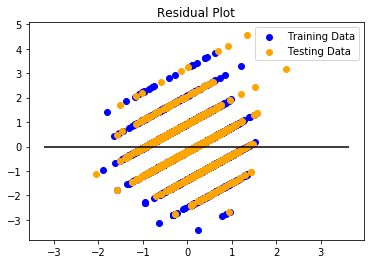

In [12]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)

#subtract y-train scaled to get the residual data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7162342447930815, R2: 0.25887887611255833


Often regression model can show higher correlation coefficients, but can suffer from overfitting. One of the ways to avoid overfitting is using cross validation that helps in estimating the error over test data, and in deciding what parameters work best for the model. Lasso and Ridge methods are designed to minimize the collinearity between variable by avoiding overfitting and also increasing model interpretability with an increased level of accuracy.

In [14]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7120901306454124, R2: 0.26316698514527526


In [15]:
# Ridge model - 
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7162338125987932, R2: 0.2588793233242339


In [16]:
# ElasticNet model - seeks a solution between Lasso and Ridge
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.712415277241236, R2: 0.26283054073162593
